Explore the logistic regression feature coefficients.

In [44]:
import sys
sys.path.append("..")
import numpy as np
from glob import glob
from run_models import load_model
import os
import matplotlib.pyplot as plt
from variables import SDG_MAP

# Load models


In [13]:
model_paths = glob("../data/trained_models/*-log*")

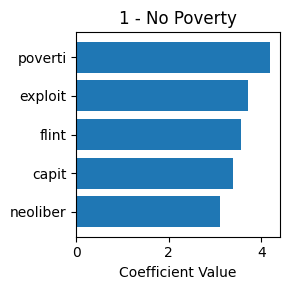

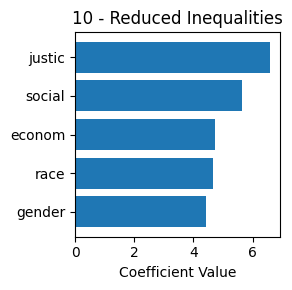

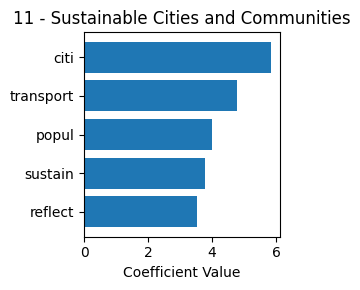

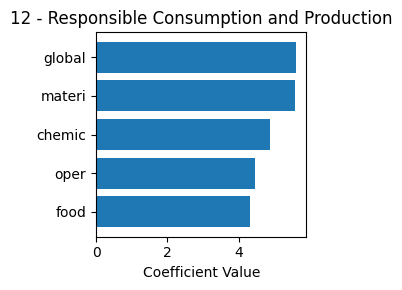

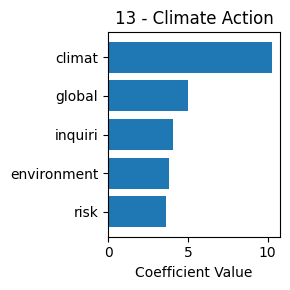

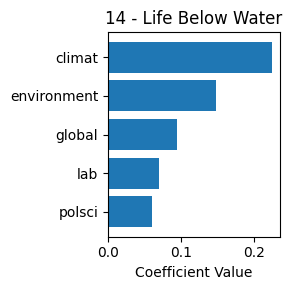

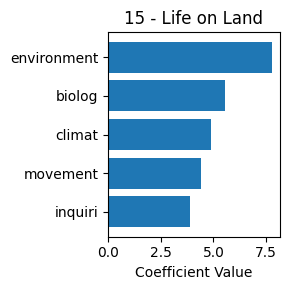

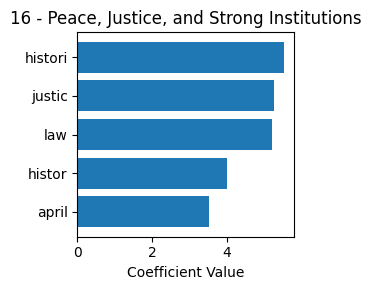

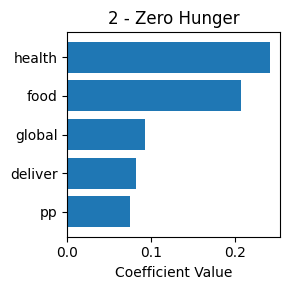

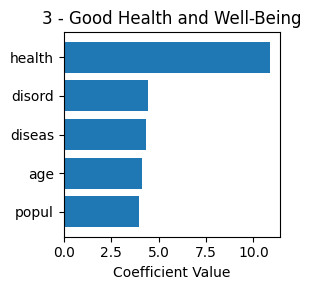

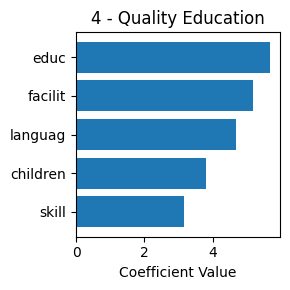

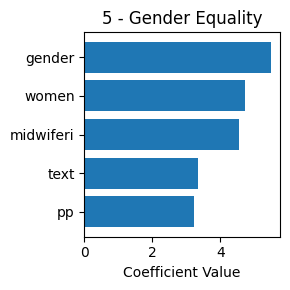

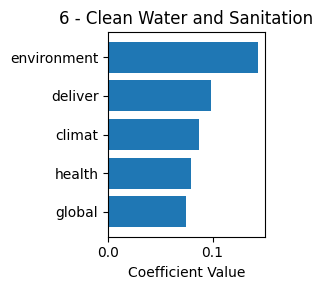

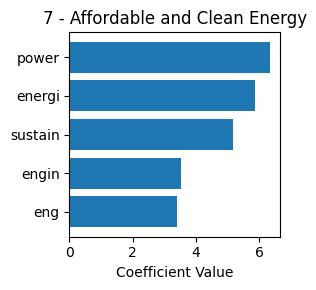

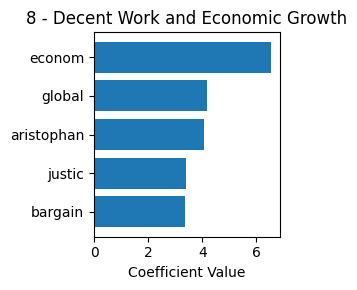

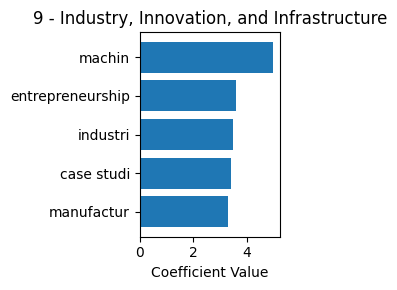

In [48]:
for path in model_paths:
    model = load_model(path)

    tfidf = model.model['tfidf']
    classifier = model.model['classifier']
    feature_names = tfidf.get_feature_names_out()
    coef = classifier.coef_[0]
    sorted_indices = np.argsort(coef)
    top_indices = sorted_indices[-5:]  # Plotting top 10 terms for better visibility

    plt.figure(figsize=(3,3))
    plt.barh(range(len(top_indices)), coef[top_indices])
    plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
    plt.xlabel("Coefficient Value")
    sdg = SDG_MAP[os.path.basename(path).split('-')[0]]
    plt.title(f"{sdg}")
    plt.tight_layout()
    plt.savefig(f"../data/presentation_figures/{sdg}_logreg.png", dpi=300)
    plt.show()